# Velocity at Depth Levels

The goal of this notebook is the following:

1) serve as an example of how to post-process CESM/MOM6 output;

2) create time averages of Eulerian velocity fields at depth levels;

3) compare model results vs. another model results.

In [1]:
%matplotlib inline
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.latlon_analysis import time_mean_latlon
from mom6_tools.m6toolbox import check_time_interval
from mom6_tools.m6plot import xycompare, polarcomparison
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from IPython.display import display, Markdown, Latex
import warnings
warnings.filterwarnings("ignore")

In [2]:
# The following parameters must be set accordingly
######################################################
# case name - must be changed for each configuration
case_nameA = "bmom.e20.BMOM.f09_t061.long_run_mct.003"
case_nameB = "bmom.e20.BMOM.f09_t061.long_run_mct.001"
# Path to the run directory
pathA = "/glade/scratch/gmarques/"+case_nameA+"/run/"
pathB = "/glade/scratch/gmarques/"+case_nameB+"/run/"
# name of ocean static file
staticA = case_nameA+".mom6.static.nc"
staticB = case_nameB+".mom6.static.nc"
# name of montly mean file in z-space
outputA = case_nameA+".mom6.h_*.nc"
outputB = case_nameB+".mom6.h_*.nc"
# initial and final years for computing time mean
year_start = 40
year_end = 50
# Put your name and email address below
author = 'Gustavo Marques (gmarques@ucar.edu)'
######################################################
# create an empty class object
class args:
  pass

args.infileA = pathA+outputA
args.infileB = pathB+outputB
args.year_start = year_start
args.year_end = year_end
args.case_nameA = case_nameA
args.savefigs = False
args.time_series = True

In [3]:
# load mom6 grid
grd = MOM6grid(pathA+staticA)

MOM6 grid successfully loaded... 



In [19]:
# load model output
out_ncA = xr.open_mfdataset(args.infileA, decode_coords=False, decode_times=False)
out_ncB = xr.open_mfdataset(args.infileB, decode_coords=False, decode_times=False)
# time in years
out_ncA['time'] = out_ncA.time/365.
out_ncB['time'] = out_ncB.time/365.

## <b>WARNING</b>: we are averaging the simulations using different start/end dates because there was a problem in the diagnostics in caseB. That was solved for years 80 to 99.

In [33]:
# check if data includes years between ti and tf
tiA = args.year_start
tfA = args.year_end
tiB = 80
tfB = 99
check_time_interval(tiA,tfA,out_ncA)
check_time_interval(tiB,tfB,out_ncB)

In [31]:
# time averages
uA = np.ma.masked_invalid(out_ncA['uo'].sel(time=slice(tiA,tfA)).mean('time').values)
vA = np.ma.masked_invalid(out_ncA['vo'].sel(time=slice(tiA,tfA)).mean('time').values)
uB = np.ma.masked_invalid(out_ncB['u'].sel(time=slice(tiB,tfB)).mean('time').values)
vB = np.ma.masked_invalid(out_ncB['v'].sel(time=slice(tiB,tfB)).mean('time').values)

### Comparing temperature and salinity averaged between years 40 and 50 caseA and 80 and 99 caseB

### u at depth level = 2.5m

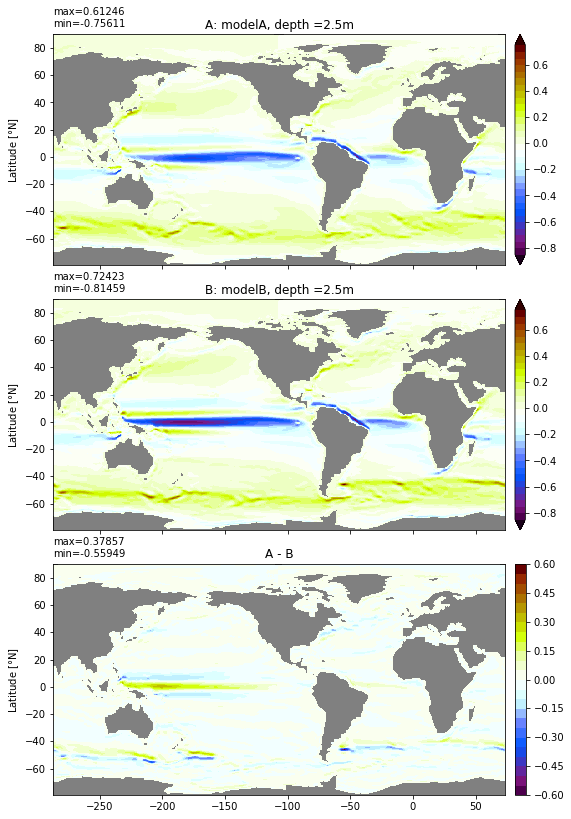

***

### v at depth level = 2.5m

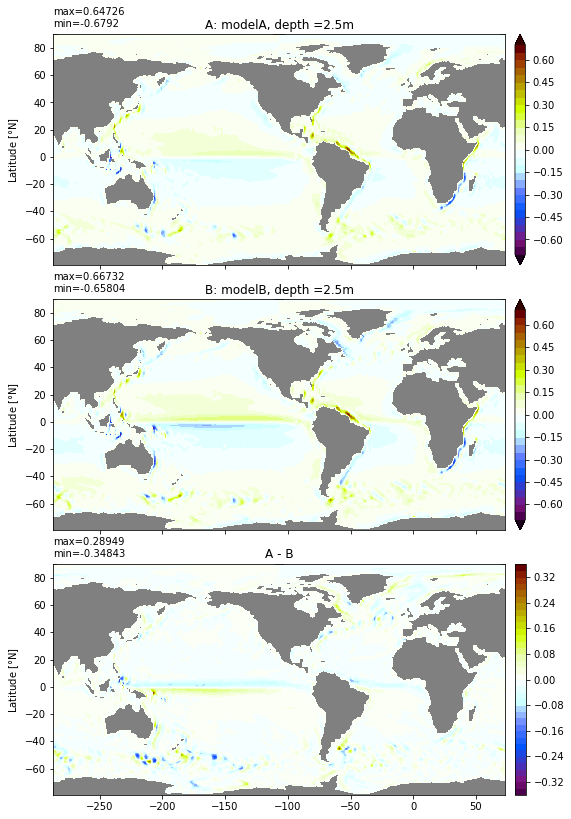

***

***

### u at depth level = 10.0m

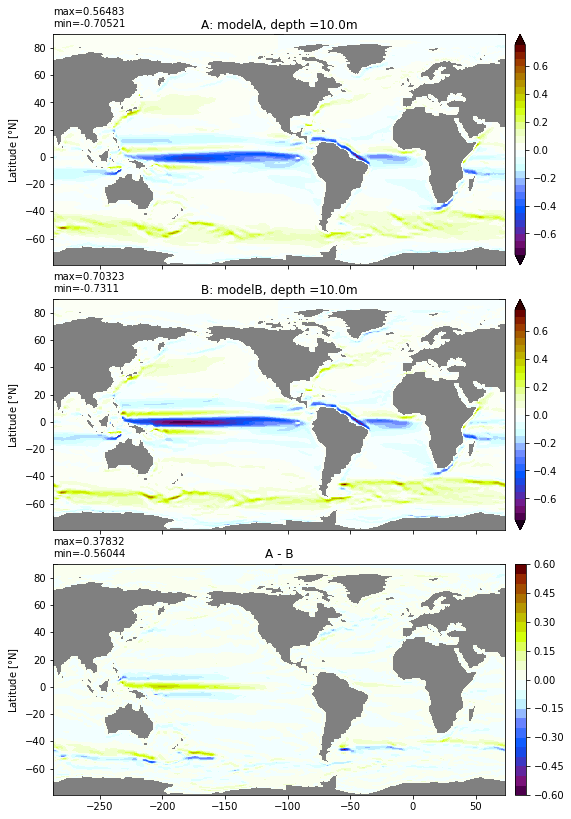

***

### v at depth level = 10.0m

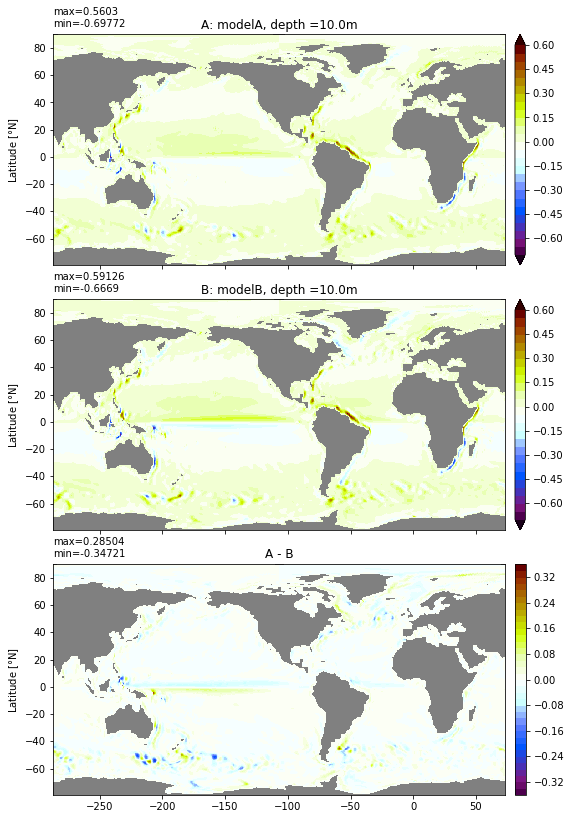

***

***

### u at depth level = 20.0m

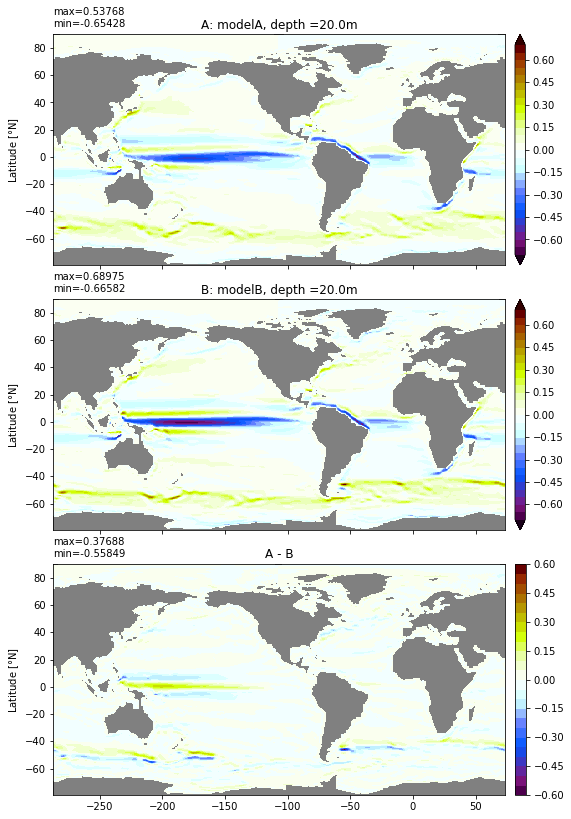

***

### v at depth level = 20.0m

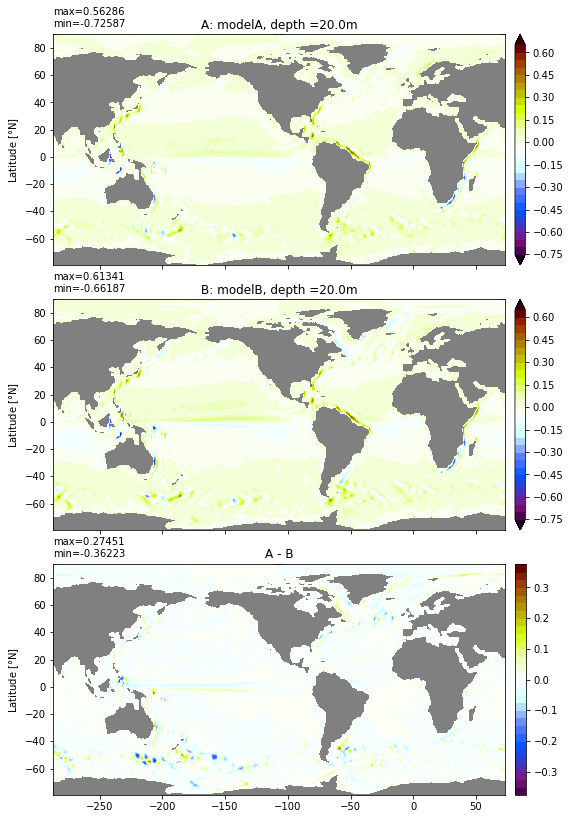

***

***

### u at depth level = 32.5m

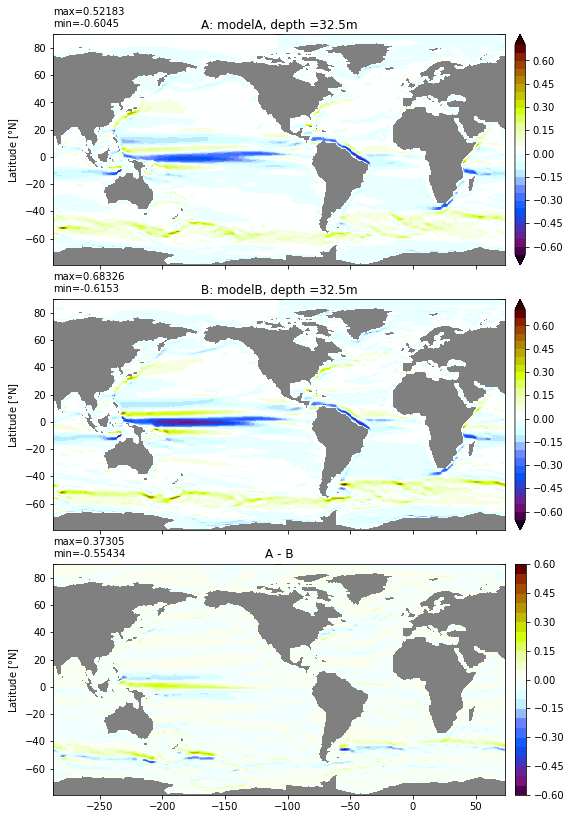

***

### v at depth level = 32.5m

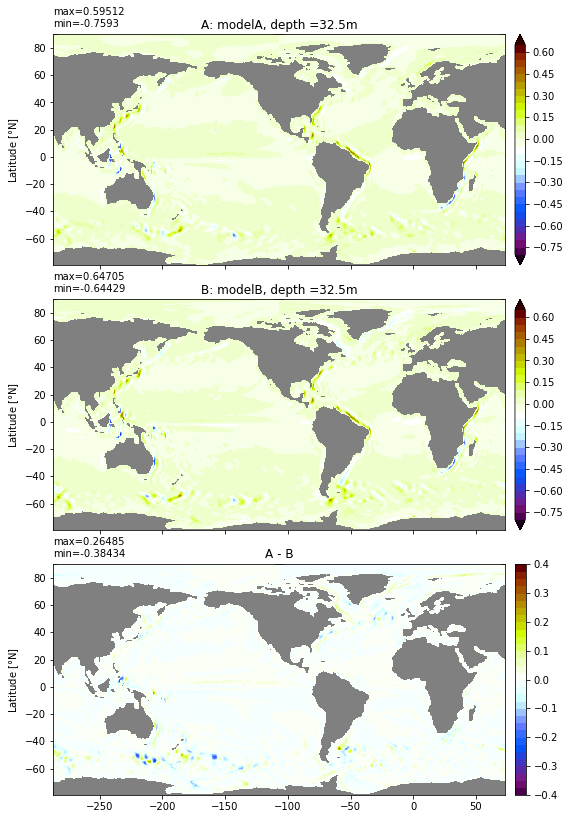

***

***

In [47]:
display(Markdown('### Comparing temperature and salinity averaged between years '+str(tiA)+' and ' \
                 + str(tfA) + ' caseA and '+str(tiB)+' and ' + str(tfB) + ' caseB'))
# loop over depths and compare TS fields
km = uA.shape[0]
for k in range(km):
  if out_ncA['z_l'][k].values < 50.0:
    display(Markdown('### u at depth level = '+str(out_ncA['z_l'][k].values)+ 'm'))
    xycompare(uA[k,:] , uB[k,:], grd.geolon_u, grd.geolat_u, #area=grd.area_t,
            title1 = 'modelA, depth ='+str(out_ncA['z_l'][k].values)+ 'm',
            title2 = 'modelB, depth ='+str(out_ncB['z_l'][k].values)+ 'm',
            extend='both',
            show= True)
    display(Markdown('***'))
    display(Markdown('### v at depth level = '+str(out_ncA['z_l'][k].values)+ 'm'))
    # WARNING: we should use geo*_v below but xlim in plots look strange so I am using geolat/geolon instead...
    xycompare( vA[k,:] , vB[k,:], grd.geolon, grd.geolat, 
            title1 = 'modelA, depth ='+str(out_ncA['z_l'][k].values)+ 'm',
            title2 = 'modelB, depth ='+str(out_ncB['z_l'][k].values)+ 'm',
            extend='both',
            show= True)
    display(Markdown('***'));display(Markdown('***'))

In [ ]:
display(Markdown('### Comparing Arctic temperature and salinity averaged between years '+str(ti)+' and '+ str(tf)))
# loop over depths and compare TS fields
km = len(phc_temp['depth'])
for k in range(km):
    display(Markdown('### temp at depth level = '+str(out_nc['z_l'][k].values)+ 'm'))
    temp_obs = np.ma.masked_invalid(phc_temp['TEMP'][k,:].values)
    polarcomparison(temp[k,:] , temp_obs, grd, 
            title1 = 'model temperature, depth ='+str(out_nc['z_l'][k].values)+ 'm',
            title2 = 'observed temperature, depth ='+str(phc_temp['depth'][k].values)+ 'm',
            extend='both',
            proj='NP',
            show= True)
    display(Markdown('***'))
    display(Markdown('### salt at depth level = '+str(out_nc['z_l'][k].values)+ 'm'))
    salt_obs = np.ma.masked_invalid(phc_salt['SALT'][k,:].values)
    polarcomparison( salt[k,:] , salt_obs, grd,
            title1 = 'model salinity, depth ='+str(out_nc['z_l'][k].values)+ 'm',
            title2 = 'observed salinity, depth ='+str(phc_temp['depth'][k].values)+ 'm',
            extend='both',
            proj='NP',
            show= True)
    display(Markdown('***'));display(Markdown('***'))